In [ ]:
##Dataset url: https://grouplens.org/datasets/movielens/latest/

import pandas as pd
import numpy as np

In [ ]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [ ]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()


,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),1
100832,610,160527,4.5,Sympathy for the Underdog (1971),1
100833,610,160836,3.0,Hazard (2005),1
100834,610,163937,3.5,Blair Witch (2016),1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 50
query_string = f'totalRatingCount >= {popularity_threshold}'
rating_popular_movie = rating_with_totalRatingCount.query(query_string)
rating_popular_movie

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215
...,...,...,...,...,...
79246,603,1997,4.000,"Exorcist, The (1973)",53
79247,606,1997,3.000,"Exorcist, The (1973)",53
79248,607,1997,5.000,"Exorcist, The (1973)",53
79249,608,1997,4.500,"Exorcist, The (1973)",53


In [ ]:
rating_popular_movie.shape

(41362, 5)

In [ ]:
#creating mean ratings data
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.000
'Hellboy': The Seeds of Creation (2004),4.000
'Round Midnight (1986),3.500
'Salem's Lot (2004),5.000
'Til There Was You (1997),4.000


In [ ]:
#creating number of ratings data
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.000,1
'Hellboy': The Seeds of Creation (2004),4.000,1
'Round Midnight (1986),3.500,2
'Salem's Lot (2004),5.000,1
'Til There Was You (1997),4.000,2


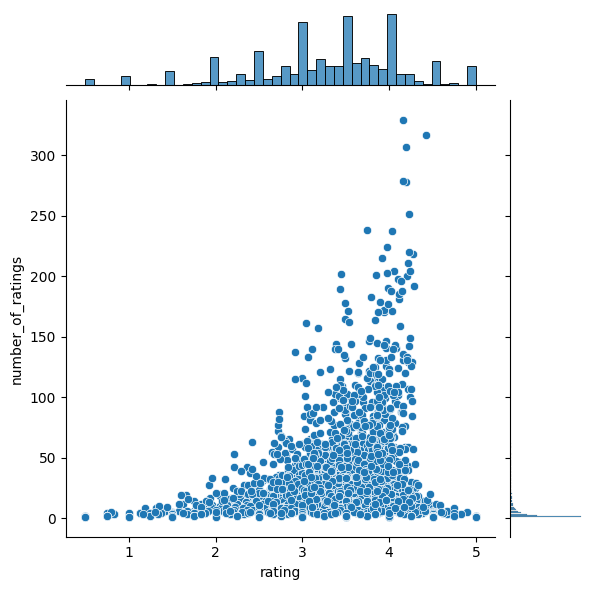

In [ ]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [ ]:
## First lets create a Pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


In [ ]:
# contains the movie-user rating data in a pivot table format, into a CSR matrix
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

# KNN
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movie_features_df.shape

(450, 606)

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)


80


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Dragonheart (1996):

1: Eraser (1996), with distance of 0.485740065574646:
2: Independence Day (a.k.a. ID4) (1996), with distance of 0.5171734094619751:
3: Twister (1996), with distance of 0.5325222015380859:
4: Mission: Impossible (1996), with distance of 0.55643630027771:
5: Rock, The (1996), with distance of 0.5668100118637085:
6: Jumanji (1995), with distance of 0.5974846482276917:
7: Nutty Professor, The (1996), with distance of 0.6019110083580017:
8: Star Wars: Episode IV - A New Hope (1977), with distance of 0.6069321632385254:
9: Broken Arrow (1996), with distance of 0.615932047367096:
